<a href="https://colab.research.google.com/github/hin1799/DeepNeuralNLP/blob/main/DataSquad_NLP_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Neural NLP - Assignment 1

## Train Word2Vec on peS2o Dataset (AllenNLP)

**Team Name: Data Squad**

**Team Members:**

- Jainisha Choksi (202211019)
- Hinal Desai (202211035)
- Man Desai (202211040)
- Rutvik Prajapati (202211053)

# Importing required libraries

In [1]:
import pandas as pd
import gzip
import json
import os
import requests
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the dataset

In [3]:
path = "/content/drive/MyDrive/NLP_Project/validation.json.gz"
print(os.path.isfile(path))

True


In [ ]:
df = pd.read_json(path, lines=True, compression='gzip')
df.head()

,id,source,version,added,created,text
0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,Investigation Some Characteristics of Biocompo...
1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,Modelling Techniques for Conjunctive Water Man...
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,Complete Targets Coverage in Energy Harvesting...
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,Nonorthogonal Multiple Access Enabled Two-Way ...
4,254774363,s2ag/valid,v1,2022-12-17T16:19:10.635Z,2022-12-14T00:00:00.000Z,106 A CASE OF COMPLETE ATRIOVENTRICULAR BLOCK ...


In [ ]:
df.shape

(111228, 6)

## Extracting paper id and field name

The dataset from peS2o consists of papers from every field of study, but our task is to collect 4000 research papers belonging to only **Computer Science** domain. Hence we have used the Semantic Scholar api to extract the field of study for the research papers.

The following functions were used to extract the field of study

In [ ]:
api_url = "https://api.semanticscholar.org/graph/v1/paper/CorpusID:{}"

# Function to get paper ID from Semantic Scholar API
def get_paper_id(corpus_id):
    try:
        response = requests.get(api_url.format(corpus_id))
        if response.status_code == 200:
            data = response.json()
            paper_id = data.get("paperId")
            return paper_id
        else:
            print(f"Failed to fetch data for CorpusID:{corpus_id}. Status code:", response.status_code)
            return None
    except Exception as e:
        print(f"Error fetching data for CorpusID:{corpus_id}: {e}")
        return None

In [ ]:
# Function to get fieldOfStudy for a single paper ID
def get_field_of_study(paper_id):
    url = 'https://api.semanticscholar.org/graph/v1/paper/batch'
    params = {'fields': 'title,fieldsOfStudy'}
    payload = {"ids": [paper_id]}

    r = requests.post(url, params=params, json=payload)
    response_data = r.json()

    # Extract fieldOfStudy from the response
    if response_data and isinstance(response_data, list):
        for item in response_data:
            if 'paperId' in item and item['paperId'] == paper_id:
                field_of_study = item.get('fieldsOfStudy', [])
                return field_of_study

    return []

**Trying on a small sample:**

In [ ]:
sampled = df.head(15000)

In [ ]:
sampled['paper_id'] = sampled['id'].apply(get_paper_id)

Failed to fetch data for CorpusID:254775618. Status code: 404
Failed to fetch data for CorpusID:254803252. Status code: 404
Failed to fetch data for CorpusID:254532019. Status code: 404
Failed to fetch data for CorpusID:255147052. Status code: 404
Failed to fetch data for CorpusID:254556863. Status code: 404
Failed to fetch data for CorpusID:255078463. Status code: 404
Failed to fetch data for CorpusID:255296364. Status code: 404
Failed to fetch data for CorpusID:254521919. Status code: 404
Failed to fetch data for CorpusID:255038966. Status code: 404
Failed to fetch data for CorpusID:254908223. Status code: 404
Failed to fetch data for CorpusID:255173019. Status code: 404
Failed to fetch data for CorpusID:255217164. Status code: 404
Failed to fetch data for CorpusID:255123712. Status code: 404
Failed to fetch data for CorpusID:255336522. Status code: 404
Failed to fetch data for CorpusID:254001910. Status code: 404
Failed to fetch data for CorpusID:254879463. Status code: 404
Failed t

<ipython-input-45-9269ff4607b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled['paper_id'] = sampled['id'].apply(get_paper_id)


In [ ]:
sampled['fieldOfStudy'] = sampled['paper_id'].apply(get_field_of_study)

In [ ]:
sampled.fieldOfStudy.value_counts()

[]                                          3733
[Medicine]                                  2658
[Computer Science]                           677
[Physics]                                    481
[Biology]                                    229
[Engineering]                                127
[Medicine, Biology]                           80
[Computer Science, Medicine]                  73
[Biology, Medicine]                           50
[Medicine, Physics]                           15
[Medicine, Computer Science]                   9
[Mathematics]                                  7
[Physics, Medicine]                            7
[Computer Science, Mathematics]                6
[Computer Science, Biology]                    3
[Computer Science, Medicine, Biology]          3
[Economics]                                    2
[Political Science]                            2
[Engineering, Medicine, Biology]               1
[Mathematics, Computer Science]                1
[Physics, Biology, M

We divided the dataset into small parts and all the team members extracted the field of study from their respective devices. It took about 3 hours 27 mins to extract the field of study for 15k rows.

In [ ]:
#All the pickle files containing only those research papers where fieldOfStudy contains 'Computer Science'
f1 = pd.read_pickle('cse_domain_1.pkl')
f2 = pd.read_pickle('cse_domain_2.pkl')
f3 = pd.read_pickle('cse_domain_3.pkl')
f4 = pd.read_pickle('cse_domain_4.pkl')
f5 = pd.read_pickle('cse_domain_5.pkl')
f6 = pd.read_pickle('cse_domain_6.pkl')
f7 = pd.read_pickle('cse_domain_7.pkl')
f8 = pd.read_pickle('cse_domain_8.pkl')
f9 = pd.read_pickle('cse_domain_9.pkl')
f10 = pd.read_pickle('cse_domain_10.pkl')
f11 = pd.read_pickle('cse_domain_11.pkl')
f12 = pd.read_pickle('cse_domain_12.pkl')
f13 = pd.read_pickle('cse_domain_13.pkl')

In [ ]:
df = pd.concat([f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13])

In [ ]:
df.head()

,id,source,version,added,created,text,paper_id,fieldOfStudy
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,Complete Targets Coverage in Energy Harvesting...,c0b6a8dfe459a17b885902f1415c5f0acfd72cc5,['Computer Science']
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,Nonorthogonal Multiple Access Enabled Two-Way ...,6602075f1e6fd8966e98de07be4230ec72b1ed0b,['Computer Science']
6,252033565,s2ag/valid,v1,2022-09-03T15:09:09.625Z,2023-01-01T00:00:00.000Z,Event-Triggered Adaptive Output Feedback Contr...,4767015228fb30be57a21b626c7867239255b3b6,['Computer Science']
18,255290365,s2ag/valid,v1,2022-12-31T16:09:26.680Z,2022-12-22T00:00:00.000Z,From MMU to MPU: Adaptation of the Pip Kernel ...,f72832c96c65f630e5fedcc932442d38ca1be760,['Computer Science']
37,249073215,s2ag/valid,v1,2022-05-27T15:22:24.852Z,2023-04-01T00:00:00.000Z,Data-Driven Cyber-Attack Detection of Intellig...,ab61f83262b23dc81f77f6dc3e80cb81e2889b7d,['Computer Science']


In [ ]:
df.shape

(4069, 8)

In [ ]:
df = df.head(4000)

In [ ]:
df.fieldOfStudy.value_counts()

['Computer Science']                                  2841
['Computer Science', 'Medicine']                       303
['Medicine', 'Computer Science']                        29
['Computer Science', 'Mathematics']                     26
['Computer Science', 'Medicine', 'Biology']             14
['Computer Science', 'Engineering']                     11
['Computer Science', 'Biology']                          6
['Computer Science', 'Physics']                          6
['Mathematics', 'Computer Science']                      5
['Computer Science', 'Biology', 'Medicine']              4
['Computer Science', 'Engineering', 'Mathematics']       3
['Medicine', 'Biology', 'Computer Science']              3
['Medicine', 'Computer Science', 'Biology']              3
['Biology', 'Computer Science']                          2
['Computer Science', 'Physics', 'Mathematics']           2
['Biology', 'Medicine', 'Computer Science']              2
['Computer Science', 'Mathematics', 'Medicine']         

In [ ]:
df.to_pickle('cse_domain_papers.pkl')

## Train-Test split

In [5]:
df = pd.read_pickle('/content/drive/MyDrive/NLP_Project/cse_domain_papers.pkl')

In [6]:
#do again
train = df.head(1000) #change to 3000

In [7]:
train

,id,source,version,added,created,text,paper_id,fieldOfStudy
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,Complete Targets Coverage in Energy Harvesting...,c0b6a8dfe459a17b885902f1415c5f0acfd72cc5,['Computer Science']
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,Nonorthogonal Multiple Access Enabled Two-Way ...,6602075f1e6fd8966e98de07be4230ec72b1ed0b,['Computer Science']
6,252033565,s2ag/valid,v1,2022-09-03T15:09:09.625Z,2023-01-01T00:00:00.000Z,Event-Triggered Adaptive Output Feedback Contr...,4767015228fb30be57a21b626c7867239255b3b6,['Computer Science']
18,255290365,s2ag/valid,v1,2022-12-31T16:09:26.680Z,2022-12-22T00:00:00.000Z,From MMU to MPU: Adaptation of the Pip Kernel ...,f72832c96c65f630e5fedcc932442d38ca1be760,['Computer Science']
37,249073215,s2ag/valid,v1,2022-05-27T15:22:24.852Z,2023-04-01T00:00:00.000Z,Data-Driven Cyber-Attack Detection of Intellig...,ab61f83262b23dc81f77f6dc3e80cb81e2889b7d,['Computer Science']
...,...,...,...,...,...,...,...,...
36805,255031734,s2ag/valid,v1,2022-12-24T16:32:27.726Z,2022-12-21T00:00:00.000Z,Leaf Classification for Crop Pests and Disease...,af9ecb4d179834ac70f594c8d032466b4aeb5c76,"['Computer Science', 'Medicine']"
36827,249104999,s2ag/valid,v1,2022-05-28T15:13:42.174Z,2023-02-24T00:00:00.000Z,Example Forgetting: A Novel Approach to Explai...,8cb1d9fbe9449bb82eb739a61b64445f9307ba72,['Computer Science']
36861,254718923,s2ag/valid,v1,2022-12-16T16:14:20.729Z,2022-12-13T00:00:00.000Z,Confidence Levels Complex q-Rung Orthopair Fuz...,291e051d8aa176ed0139d004888e72efc044f791,['Computer Science']
36877,253629670,s2ag/valid,v1,2022-11-19T14:27:00.816Z,2022-12-01T00:00:00.000Z,Database Watermarking Algorithm Based on Decis...,8f06522c81294f83828d44841ead14a1ba12f03e,['Computer Science']


# Preprocessing Cleanup

(i) stopwords

(ii) urls

(iii) bullets

(iv) apostrophe

(v) hyphens

(vi) enumerations (eg. like how this list is being enumerated)

(vii) numerical-to-text conversion

(viii) punctuations

In [8]:
!pip install num2words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=91617f338b7d15b9fb2c7ba2d5436682a7d61b7a0a8c1a5b6a657c7bf0f5cafe
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [9]:
import nltk
import re
from num2words import num2words
from nltk.tokenize import word_tokenize

In [10]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [11]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [12]:
#Preprocessing function
def preprocess_text(text):
  #Remove URLs
  text = re.sub(r'http\S+|www\S+', '', text)

  #Remove bullets
  text = re.sub(r'•', '', text)

  # Remove apostrophes and hyphens
  text = re.sub(r"['’]", '', text)
  text = re.sub(r'-', ' ', text)

  # Remove punctuation except full stop (period) so that we can know when sentences stop
  text = re.sub(r'[^\w\s\'.]', '', text)

  #Removing leading and trailing whitespaces
  text = text.strip()

  #Remove stopwords
  tokens = text.split()
  tokens = [word.lower() for word in tokens if word.lower() not in stopwords]
  text = ' '.join(tokens)

  #Converting numbers to text
  text = re.sub(r'\d+', '', text)
  tokens = word_tokenize(text)
  converted_tokens = []
  for token in tokens:
    try:
      num = int(token)
      word = num2words(num)
      converted_tokens.append(word)
    except ValueError:
      converted_tokens.append(token)
  text = ' '.join(converted_tokens)

  return text

In [13]:
#Applying preprocessing function
train['cleaned_text'] = train['text'].apply(preprocess_text)

<ipython-input-13-813a7ae8618a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cleaned_text'] = train['text'].apply(preprocess_text)


In [14]:
train.head()

,id,source,version,added,created,text,paper_id,fieldOfStudy,cleaned_text
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,Complete Targets Coverage in Energy Harvesting...,c0b6a8dfe459a17b885902f1415c5f0acfd72cc5,['Computer Science'],complete targets coverage energy harvesting in...
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,Nonorthogonal Multiple Access Enabled Two-Way ...,6602075f1e6fd8966e98de07be4230ec72b1ed0b,['Computer Science'],nonorthogonal multiple access enabled two way ...
6,252033565,s2ag/valid,v1,2022-09-03T15:09:09.625Z,2023-01-01T00:00:00.000Z,Event-Triggered Adaptive Output Feedback Contr...,4767015228fb30be57a21b626c7867239255b3b6,['Computer Science'],event triggered adaptive output feedback contr...
18,255290365,s2ag/valid,v1,2022-12-31T16:09:26.680Z,2022-12-22T00:00:00.000Z,From MMU to MPU: Adaptation of the Pip Kernel ...,f72832c96c65f630e5fedcc932442d38ca1be760,['Computer Science'],mmu mpu adaptation pip kernel constrained devi...
37,249073215,s2ag/valid,v1,2022-05-27T15:22:24.852Z,2023-04-01T00:00:00.000Z,Data-Driven Cyber-Attack Detection of Intellig...,ab61f83262b23dc81f77f6dc3e80cb81e2889b7d,['Computer Science'],data driven cyber attack detection intelligent...


In [15]:
#Viewing the cleaned text for one row
train.iloc[0]['cleaned_text']

'complete targets coverage energy harvesting internet things ambient backscatter article considers deriving set covers set active nodes responsible monitoring targets internet things iot network . key distinction prior works article considers sensor nodes aided backscatter communications allow communicate negligible energy cost using ambient radio frequency rf signals . article contains three main novelties . first presents mixed integer linear program milp used compute global optimal solution . second also outlines centralized greedy scheduling cgs algorithm selects nodes based energy number covered targets . third presents distributed greedy scheduling dgs algorithm selects nodes according energy level . simulation results show equipping nodes ambient backscattering capability increases ratio complete targets coverage compared existing techniques .'

# The target matrix Wt

In [16]:
corpus = train.cleaned_text.tolist() #list of all sentences
corpus = " ".join(corpus) #converting it to string

In [17]:
list_sentences = corpus.split(".") #gives the list of sentences

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_mat = tfidf.fit_transform(list_sentences)

In [ ]:
tfidf_df = pd.DataFrame(tfidf_mat.toarray(), columns=tfidf.get_feature_names_out())

In [ ]:
# tfidf_df['sentence'] = list_sentences

In [ ]:
tfidf_df.shape

(8939, 13081)

In [ ]:
tfidf_df.head()

,_i,_spheres,aaa,aafdg,aarp,abandonment,abbreviated,abcnn,abdominal,abdul,...,ﬁngers,ﬁnite,ﬁrst,ﬁtting,ﬁve,ﬁxed,ﬂexible,ﬂow,ﬂows,ﬂuids
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(f"There are {tfidf_df.shape[0]} sentences and {tfidf_df.shape[1]} unique words in the train set.")

There are 8939 sentences and 13081 unique words in the train set.


# The Context Matrix Wc

In [ ]:
context_window = 1
context_matrix = []

In [ ]:
tfidf_matrix_array = tfidf_mat.toarray()

In [ ]:
for i in range(len(list_sentences)):
  context_vector = []
  for j in range(max(0, i-context_window), min(len(list_sentences), i+context_window+1)):
    if i!=j:
      context_vector.extend(tfidf_matrix_array[j])
  context_matrix.append(context_vector)

In [ ]:
print(context_matrix[0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
# #Converting it to a sparse matrix
# from scipy.sparse import csr_matrix

# context_matrix_sparse = csr_matrix(context_matrix)

# Word2Vec

(Trying for sentences)

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [19]:
dtype = torch.FloatTensor

In [ ]:
# list_sentences - this is the word sequence

In [20]:
#getting the unique words - vocabulary
word_list = list(set(" ".join(list_sentences).split()))

In [21]:
len(set(word_list))

13122

In [22]:
#getting the unique sentences
sentence_list = list(set(list_sentences))

In [23]:
len(sentence_list)

8588

In [24]:
sent_dict = {w:i for i, w in enumerate(sentence_list)}

In [ ]:
# sent_dict

In [34]:
#Parameters for word2vec
batch_size = 32
embedding_size = 2
vocab_size = len(sentence_list)

In [26]:
#Making skip gram of window size 1
skipgrams = []
for i in range(1, len(list_sentences)-1):
  input = sent_dict[list_sentences[i]]
  context = [sent_dict[list_sentences[i-1]], sent_dict[list_sentences[i+1]]]

  for w in context:
    skipgrams.append([input, w])

In [27]:
skipgrams[:7]

[[441, 7905],
 [441, 932],
 [932, 441],
 [932, 3989],
 [3989, 932],
 [3989, 5386],
 [5386, 3989]]

In [30]:
#Structure the data in batches and convert to one hot vectors
np.random.seed(42)

def get_random_batch(data, size):
  random_inputs = []
  random_labels = []
  random_index = np.random.choice(range(len(data)), size, replace=False)

  for i in random_index:
    #one hot encoding
    random_inputs.append(np.eye(voc_size)[data[i][0]])  # input
    random_labels.append(data[i][1])  # context word

  return random_inputs, random_labels

In [33]:
get_random_batch(skipgrams[:7], size=4)

([array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.])],
 [7905, 932, 3989, 5386])

In [35]:
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()

        # parameters between -1 and + 1
        self.W = nn.Parameter(-2 * torch.rand(vocab_size, embedding_size) + 1).type(dtype) # vocab_size -> embedding_size Weight
        self.V = nn.Parameter(-2 * torch.rand(embedding_size, vocab_size) + 1).type(dtype) # embedding_size -> vocab_size Weight

    def forward(self, X):
        hidden_layer = torch.matmul(X, self.W) # hidden_layer : [batch_size, embedding_size]
        output_layer = torch.matmul(hidden_layer, self.V) # output_layer : [batch_size, vocab_size]
        #return output_layer
        return output_layer

model = Word2Vec()

In [37]:
#Training the model
model.train()

criterion = nn.CrossEntropyLoss() # Softmax
optimizer = optim.Adam(model.parameters(), lr=0.0001) #using Adam optimizer

In [51]:
# Training
losses = []

for epoch in range(500):

    input_batch, target_batch = get_random_batch(skipgrams, batch_size)

    input_batch = torch.Tensor(input_batch)
    target_batch = torch.LongTensor(target_batch)

    optimizer.zero_grad()
    output = model(input_batch)

    # output : [batch_size, voc_size], target_batch : [batch_size] (LongTensor, not one-hot encoded)
    loss = criterion(output, target_batch)
    losses.append(loss)
    #print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))
    if (epoch + 1)%100 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward()
    optimizer.step()

Epoch: 0100 cost = 9.188838
Epoch: 0200 cost = 9.172408
Epoch: 0300 cost = 9.061283
Epoch: 0400 cost = 9.108019
Epoch: 0500 cost = 9.246553


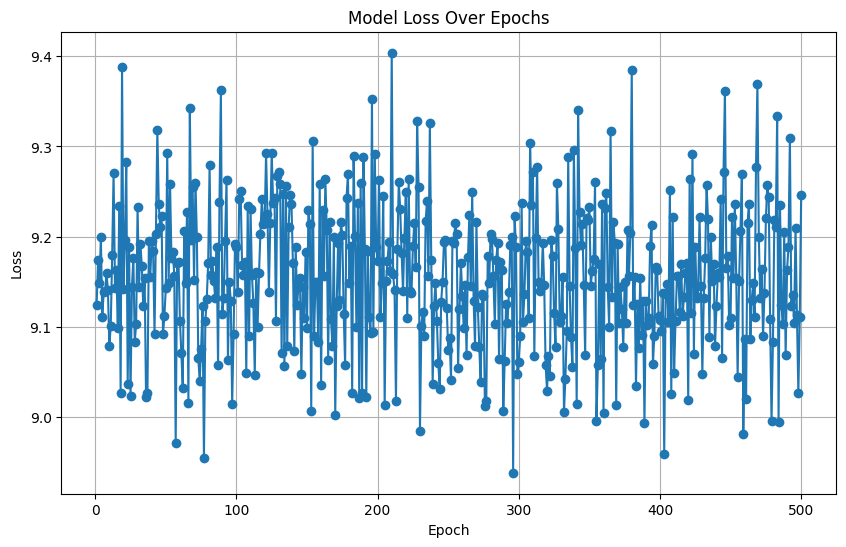

In [52]:
#Plotting the loss across each epoch

epochs = range(1, len(losses) + 1)
losses = [l.detach().numpy() for l in losses]

plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(epochs, losses, marker='o', linestyle='-')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.show()

In [53]:
# Learned W
W, _= model.parameters()
print(W.detach())

tensor([[ 0.8496, -0.8530],
        [ 0.0359, -0.8248],
        [-0.0133,  0.9527],
        ...,
        [-0.3169,  0.3329],
        [-0.7486,  0.8376],
        [ 0.1116, -0.6041]])


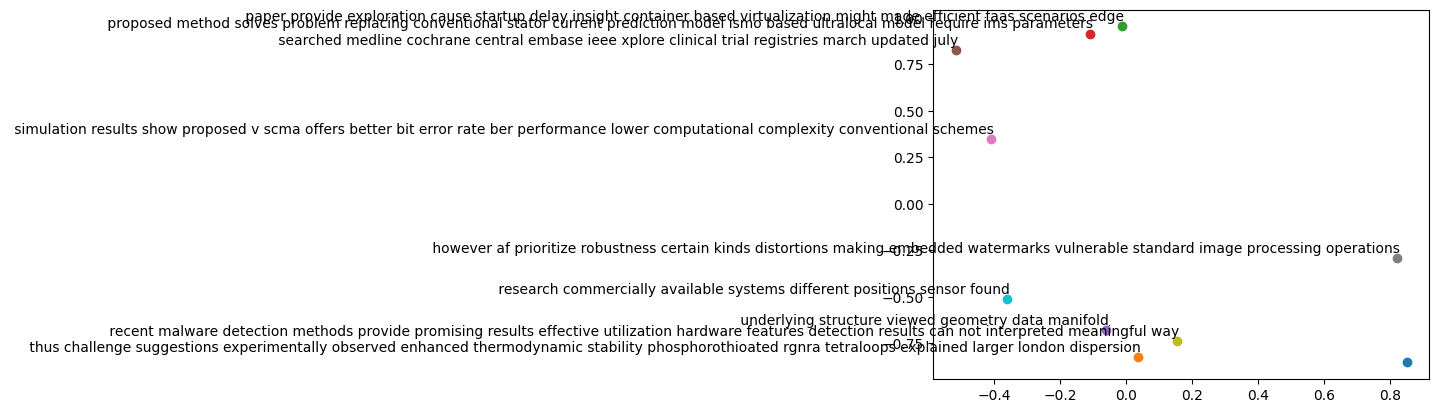

In [60]:
for i, word in enumerate(sentence_list[:10]):
    W, _= model.parameters()
    W = W.detach()
    x,y = float(W[i][0]), float(W[i][1])
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

**Evaluation**

## Trying skipgram for words (word2vec from scratch)

In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [79]:
dtype = torch.FloatTensor

In [ ]:
sentences = ["i like dog", "john loves icecream", "icecream made in newyork", "dog hates cat", "john likes cat"]

In [ ]:
#listing all words
word_sequence = " ".join(sentences).split()
print(word_sequence)

['i', 'like', 'dog', 'john', 'loves', 'icecream', 'icecream', 'made', 'in', 'newyork', 'dog', 'hates', 'cat', 'john', 'likes', 'cat']


In [ ]:
#vocabulary
word_list = list(set(word_sequence))

In [ ]:
print(word_list)

['made', 'john', 'icecream', 'cat', 'in', 'like', 'dog', 'i', 'newyork', 'loves', 'hates', 'likes']


In [ ]:
word_dict = {w:i for i, w in enumerate(word_list)}

In [ ]:
print(word_dict)

{'made': 0, 'john': 1, 'icecream': 2, 'cat': 3, 'in': 4, 'like': 5, 'dog': 6, 'i': 7, 'newyork': 8, 'loves': 9, 'hates': 10, 'likes': 11}


In [ ]:
#Parameters for word2vec
batch_size = 20
embedding_size = 2
voc_size = len(word_list)

In [ ]:
#input word
j=1
print("Input word: ")
print(word_sequence[j], word_dict[word_sequence[j]])

Input word: 
like 5


In [ ]:
#context words
print("Context words: ")
print(word_sequence[j-1], word_sequence[j+1])
print([word_dict[word_sequence[j-1]], word_dict[word_sequence[j+1]]])

Context words: 
i dog
[7, 6]


In [ ]:
#Making skip gram of window size 1
skipgrams = []
for i in range(1, len(word_sequence)-1):
  input = word_dict[word_sequence[i]]
  context = [word_dict[word_sequence[i-1]], word_dict[word_sequence[i+1]]]

  for w in context:
    skipgrams.append([input, w])

In [ ]:
skipgrams[:6]

[[5, 7], [5, 6], [6, 5], [6, 1], [1, 6], [1, 9]]

In [ ]:
#Structure the data in batches and convert to one hot vectors
np.random.seed(172)

def random_batch(data, size):
  random_inputs = []
  random_labels = []
  random_index = np.random.choice(range(len(data)), size, replace=False)

  for i in random_index:
    #one hot encoding
    random_inputs.append(np.eye(voc_size)[data[i][0]])  # input
    random_labels.append(data[i][1])  # context word

  return random_inputs, random_labels

In [ ]:
random_batch(skipgrams[:6], size=3)

([array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])],
 [7, 6, 1])

In [ ]:
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()

        # parameters between -1 and + 1
        self.W = nn.Parameter(-2 * torch.rand(voc_size, embedding_size) + 1).type(dtype) # voc_size -> embedding_size Weight
        self.V = nn.Parameter(-2 * torch.rand(embedding_size, voc_size) + 1).type(dtype) # embedding_size -> voc_size Weight

    def forward(self, X):
        hidden_layer = torch.matmul(X, self.W) # hidden_layer : [batch_size, embedding_size]
        output_layer = torch.matmul(hidden_layer, self.V) # output_layer : [batch_size, voc_size]
        #return output_layer
        return output_layer

model = Word2Vec()
# Set the model in train mode
model.train()

criterion = nn.CrossEntropyLoss() # Softmax (for multi-class classification problems) is already included
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training
for epoch in range(5000):

    input_batch, target_batch = random_batch(skipgrams, batch_size)

    # new_tensor(data, dtype=None, device=None, requires_grad=False)
    input_batch = torch.Tensor(input_batch)
    target_batch = torch.LongTensor(target_batch)

    optimizer.zero_grad()
    output = model(input_batch)

    # output : [batch_size, voc_size], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1)%1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward()
    optimizer.step()

<ipython-input-58-17d176064e67>:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  input_batch = torch.Tensor(input_batch)


Epoch: 1000 cost = 1.651772
Epoch: 2000 cost = 1.469988
Epoch: 3000 cost = 1.538365
Epoch: 4000 cost = 1.530655
Epoch: 5000 cost = 1.326476


In [ ]:

# Learned W
W, _= model.parameters()
print(W.detach())

tensor([[-0.5123, -0.2222],
        [-2.4321, -0.1048],
        [-0.7937, -2.5998],
        [ 3.5499, -0.5243],
        [ 0.6705, -0.7602],
        [-0.6888,  3.9527],
        [ 2.5079, -0.0247],
        [ 0.2759, -0.8159],
        [-1.5047,  1.9992],
        [ 0.5537, -4.0713],
        [-4.1344,  0.4204],
        [-0.0880, -0.8066]])


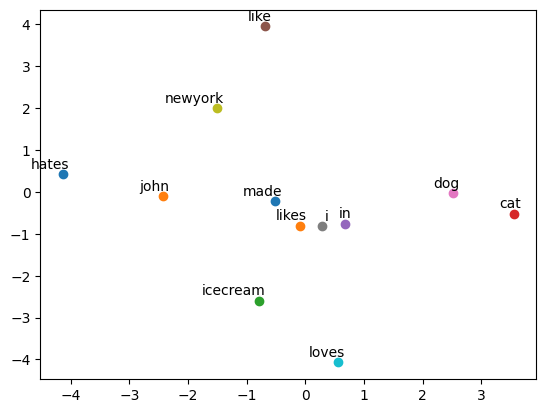

In [ ]:
for i, word in enumerate(word_list):
    W, _= model.parameters()
    W = W.detach()
    x,y = float(W[i][0]), float(W[i][1])
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()